## **Setting up the Necessities**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
batch_size = 32
version = 3

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Sports Activity Recognizer

/content/drive/My Drive/Sports Activity Recognizer


## **Fetch Data**

In [ ]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = batch_size)
torch.save(dls, f"dataloaders/dataloader_version{version}.pkl")

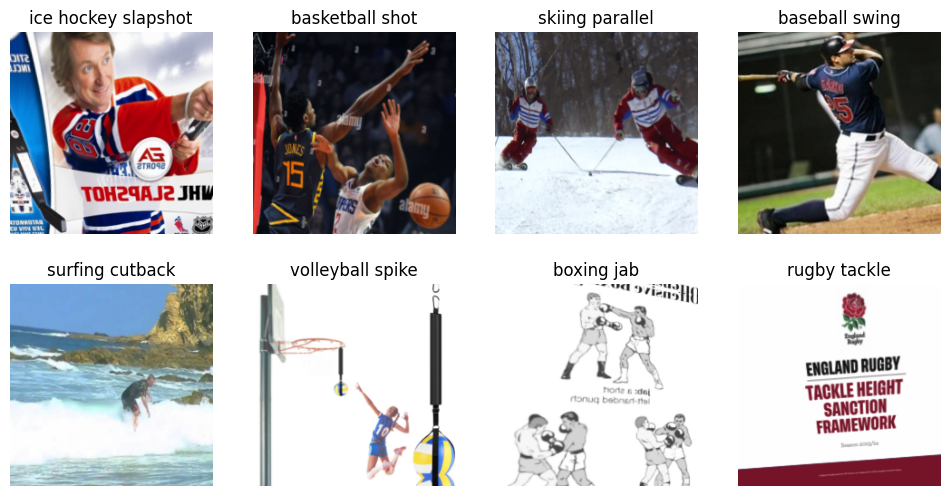

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


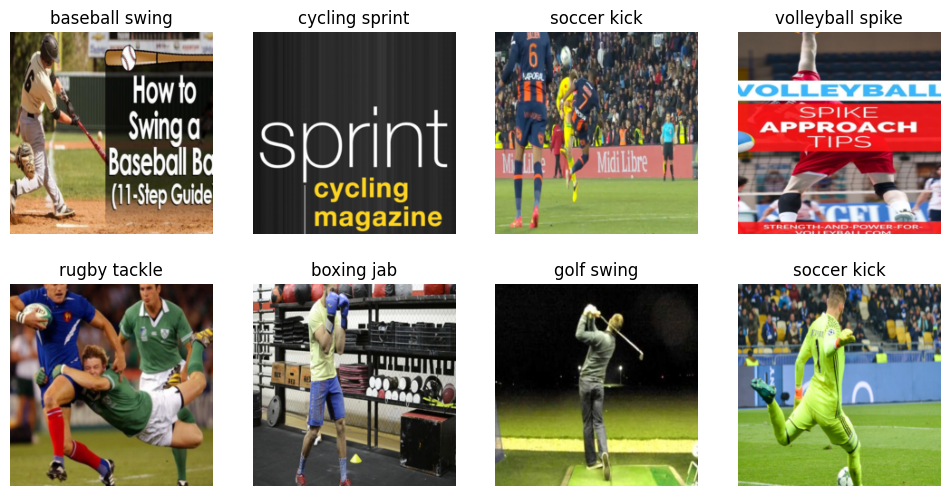

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

## **Model Training and Data Cleaning**

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 83.4MB/s]


In [ ]:
model.load(f"sports-action-recognizer-version{version-1}")

In [ ]:
model.fine_tune(2) #10 epoch at first training,5 epochs at second training,3 epochs at third training,2 epochs at fourth training

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.091364,0.049873,0.013453,0.986547,32:00


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.098313,0.060083,0.011211,0.988789,44:03
1,0.098673,0.050295,0.015695,0.984305,43:59


In [ ]:
model.save(f"sports-action-recognizer-version{version}")

Path('models/sports-action-recognizer-version3.pth')

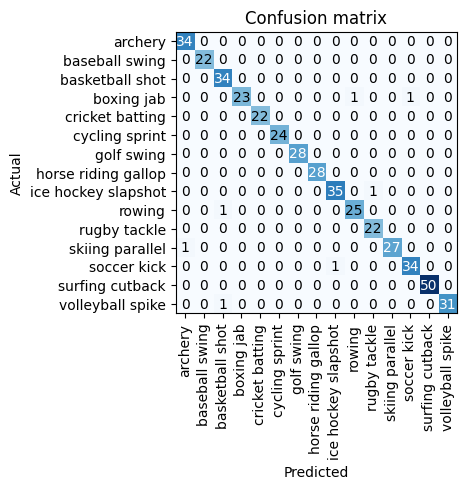

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

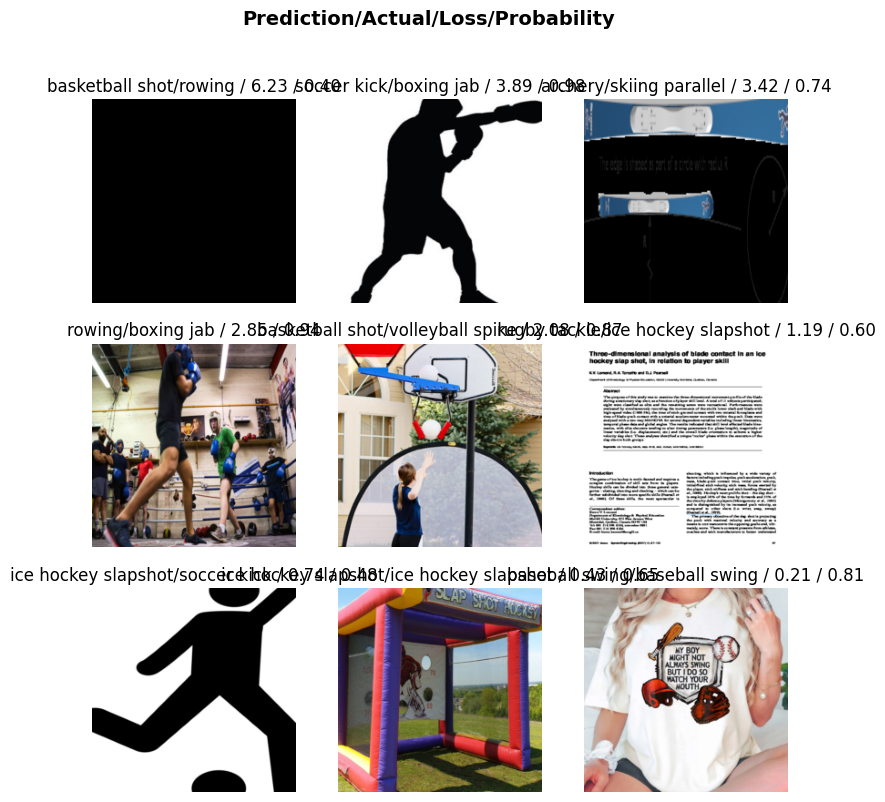

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

## **Exporting Model**

In [ ]:
model.export(f"{model_path}/sports-action-recognizer-version{version}.pkl")

## **Find the sequence**

In [ ]:
dls.train.vocab

['archery', 'baseball swing', 'basketball shot', 'boxing jab', 'cricket batting', 'cycling sprint', 'golf swing', 'horse riding gallop', 'ice hockey slapshot', 'rowing', 'rugby tackle', 'skiing parallel', 'soccer kick', 'surfing cutback', 'volleyball spike']